   position         team    points       won      lost      draw    played  \
0         1    Barcelona  3.635700  3.490302 -2.506065 -0.822549  0.777873   
1         2  Real Madrid  3.370796  3.281700 -2.061375 -1.126993  0.777873   
2         3     Valencia  1.980049  1.612890 -0.949652 -0.213661  0.777873   
3         4   Villarreal  1.384015  0.987086 -0.282619 -0.213661  0.777873   
4         5      Sevilla  1.119110  0.778485  0.162070 -0.518105  0.777873   

   goals_for  goals_against  goal_difference  year  
0   3.025203      -2.132365         0.232297  2010  
1   3.473082      -1.174658         0.209008  2010  
2   1.041742      -0.296759         0.057843  2010  
3   0.401915      -0.296759         0.028615  2010  
4   0.913776       1.059993        -0.009979  2010  
(240, 11)
position             int64
team                object
points             float64
won                float64
lost               float64
draw               float64
played             float64
goals_for     

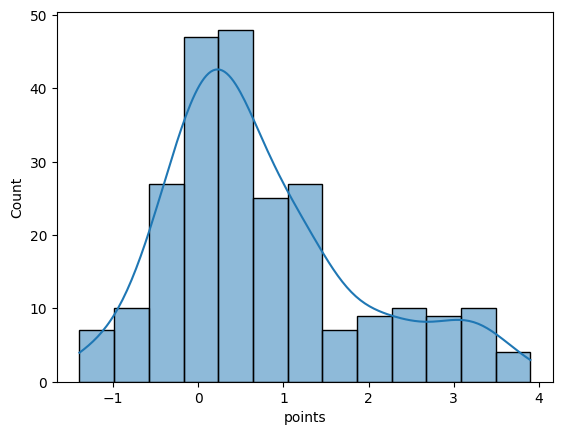

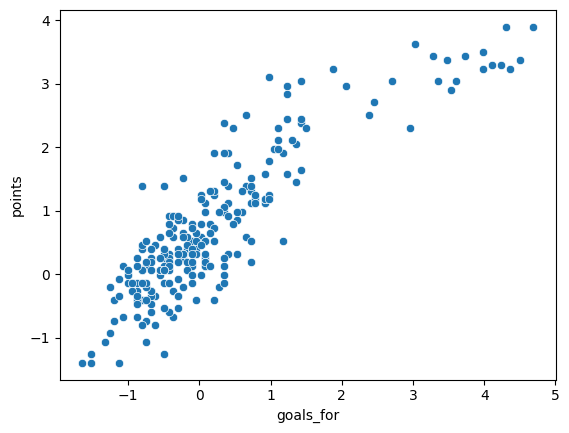

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
arr=[]
year1=2010
year2=2011
while(year1!=2022):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'draw', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()




In [60]:
mean_points= 41.10165662650602
stdev_points= 15.099800434416446

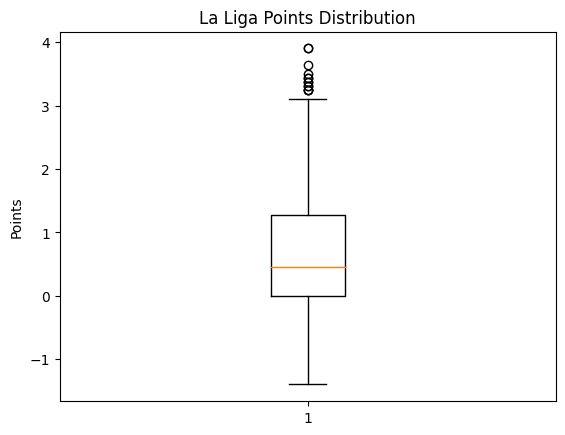

upper bound 3.1803958987455263
lower bound -1.919009244682502
points upper 89.125
points lower 12.125
Outliers:
   position             team    points       won      lost      draw  \
0         1        Barcelona  3.635700  3.490302 -2.506065 -0.822549   
1         2      Real Madrid  3.370796  3.281700 -2.061375 -1.126993   
0         1      Real Madrid  3.900604  3.907504 -2.506065 -1.431437   
1         2        Barcelona  3.304570  3.073099 -2.283720 -0.518105   
0         1        Barcelona  3.900604  3.907504 -2.506065 -1.431437   
0         1  Atlético Madrid  3.238344  3.073099 -2.061375 -0.822549   
0         1        Barcelona  3.503248  3.490302 -2.061375 -1.431437   
1         2      Real Madrid  3.370796  3.490302 -1.616686 -2.040326   
0         1        Barcelona  3.304570  3.281700 -1.839031 -1.431437   
1         2      Real Madrid  3.238344  3.073099 -2.061375 -0.822549   
0         1      Real Madrid  3.437022  3.281700 -2.283720 -0.822549   
1         2        Barce

In [61]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')


plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
print("upper bound",upper_bound)



lower_bound = q1 - 1.5*iqr
print("lower bound",lower_bound)
print("points upper",(upper_bound*stdev_points)+mean_points)
print("points lower",(lower_bound*stdev_points)+mean_points)



outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)



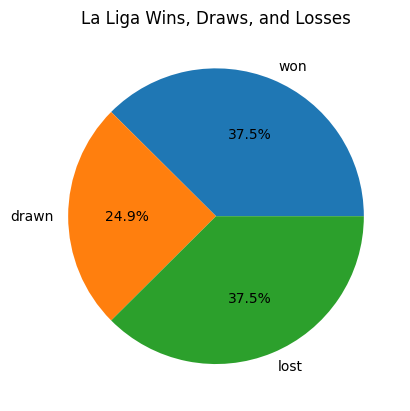

In [62]:
arr=[]
year1=2010
year2=2011
while(year1!=2022):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()

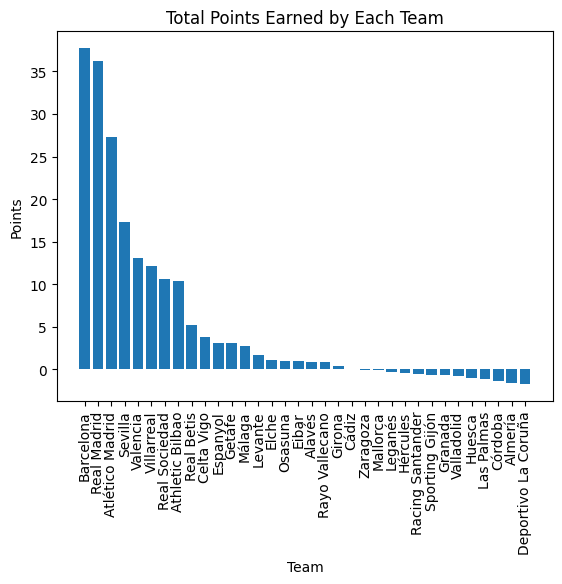

In [63]:
arr=[]
year1=2010
year2=2011
while(year1!=2022):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
df = pd.concat(data_frames)

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()


Text(0, 0.5, 'points')

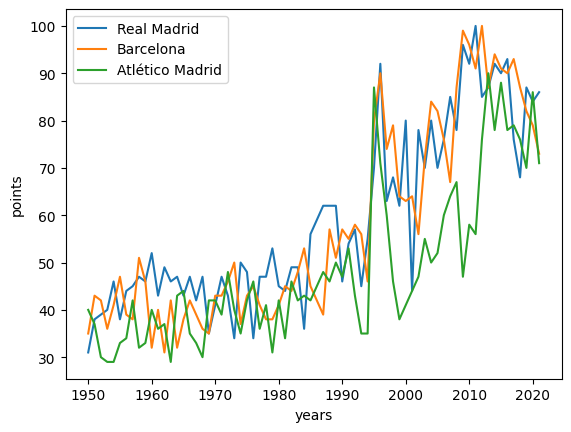

In [64]:
string="../teams/Real Madrid.csv"
data=pd.read_csv(string)
data= data[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]


string="../teams/Barcelona.csv"
data2=pd.read_csv(string)
data2= data2[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]
string="../teams/Atlético Madrid.csv"
data3=pd.read_csv(string)
data3= data3[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]


year=[]
for i in data['year']:
    year.append(int(i[0:4]))
year2=[]
for i in data2['year']:
    year2.append(int(i[0:4]))
year3=[]
for i in data3['year']:
    year3.append(int(i[0:4]))



  
plt.plot(year, data["points"], label=data["team"][0])
plt.plot(year2, data2["points"], label=data2["team"][0])
plt.plot(year3, data3["points"], label=data3["team"][0])
plt.legend()

plt.xticks(range(min(year), max(year)+1, 10))
plt.xlabel("years")
plt.ylabel("points")